# Tensorflow 2를 활용한 Multi Layer Perceptron 실습
이번 실습에서는 Tensorflow 2를 활용하여 가장 간단한 Neural Network 구조인 MLP(Multi Layer Perceptron)을 직접 생성해 본다.<br>
입문과정용으로 많이 쓰이는 Fashion MNIST dataset을 이용하여 옷의 종류를 구분해보는 Neural Network를 만들어 볼 것이다. <br>
먼저 Tensorflow를 Import한다.

In [1]:
import tensorflow as tf

## Dataset 불러오기
Tensorflow에서는 Fashion MNIST dataset을 불러오기 편하도록 Library에 기본 함수로 지정해 두었다. 아래 명령어를 수행하여 데이터셋을 로드하고, Train/Test set으로 구분해 주자.<br>
Fashion MNIST는 총 10개의 class가 있고, 각 이미지별로 0~9의 Label이 지정되어 있다. 0은 T-shirt/top, 1은 Trouser,..에 해당하고, 이를 식별하기 쉽게 class_names에 저장해 두자.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

#Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Split train set into train/valid set
from sklearn import model_selection
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.2)

#Rescale data to be in the range of [0,1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

데이터를 보고 싶으면 matplotlib를 이용하여 확인할 수 있다.

In [3]:
import matplotlib.pyplot as plt

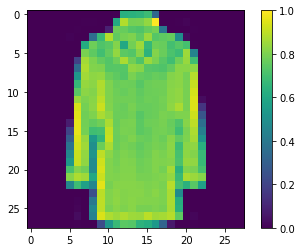

In [4]:
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Model 구성하기
이제 아주 간단한 Model을 구성해 볼 것이다.
Tensorflow2에서 제공하는 keras의 sequential method를 사용하면 원하는 Layer를 차곡차곡 쌓아가면서 모델을 구성할 수 있다. <br>
아래에서는 28x28 image를 Input으로 받아서 1차원으로 쭉 편 다음,<br> 
128개 Node를 가지는 Hidden layer를 연결하고 Relu activation을 한 번 거친 후에, <br>
20%를 랜덤으로 누락시키는 Drop Out를 수행한 뒤 <br>
10개의 Node를 갖는 Output으로 연결하고 Softmax를 수행하도록 NN을 구성하였다.

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')  
])

다음으로 Loss, Optimizer, Metrics등을 정의하여 모델을 컴파일해준다.
10개 중 하나로 Classification하는 문제이므로 SparseCategoricalCrossentropy를 Loss로 사용해준다.

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 모델 트레이닝
model.fit 명령어를 이용하면 우리가 구성한 모델을 트레이닝할 수 있다.

In [9]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7207 - accuracy: 0.7487 - val_loss: 0.4047 - val_accuracy: 0.8569
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4157 - accuracy: 0.8500 - val_loss: 0.4017 - val_accuracy: 0.8503
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3837 - accuracy: 0.8625 - val_loss: 0.3523 - val_accuracy: 0.8695
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3549 - accuracy: 0.8697 - val_loss: 0.3355 - val_accuracy: 0.8788
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3414 - accuracy: 0.8776 - val_loss: 0.3373 - val_accuracy: 0.8771
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3268 - accuracy: 0.8797 - val_loss: 0.3181 - val_accuracy: 0.8824
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3176 - accuracy: 0.8834 - val_loss: 0.3181 - val_accuracy:

## 트레이닝 결과 확인
트레이닝이 진행됨에 따라 Loss는 줄어들고 Accuracy는 올라가야 할 것입니다.<br>
이런 트렌드가 관찰되지 않는다면 무언가 잘못되었다고 볼 수 있습니다. <br>
그래프를 그려서 실제로 이런 트렌드가 관찰되는지 확인해 봅시다.

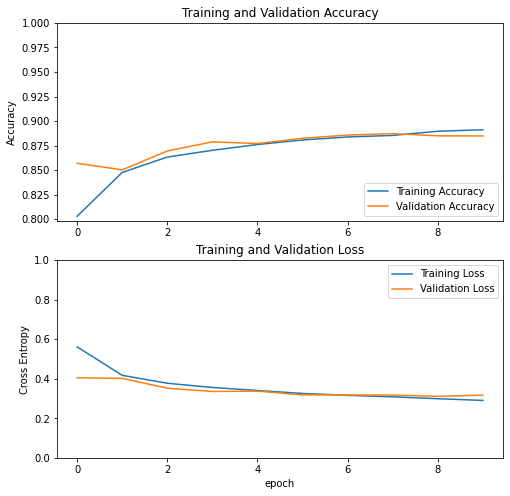

In [10]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Test set에 대해서도 Accuracy가 잘 나오는지 확인해 보자.

In [30]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.4064 - accuracy: 0.8866


[0.4064445197582245, 0.8866000175476074]

In [40]:
predictions = model.predict(x_test)

Test set에서 하나의 샘플을 추출하여 정답과 예측 결과를 비교해 볼 수도 있다.

In [43]:
import numpy as np
#Plot image with label
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
#Plot 
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  _ = plt.xticks(range(10), class_names, rotation=45)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

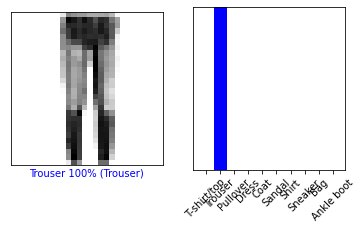

In [45]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

# 과제: CIFAR10 데이터셋을 이용하여 MLP 모델 만들고 훈련시키기
다른 데이터셋을 이용하여 스스로 MLP를 구성하고 훈련해 보자. <br>
10개의 서로 다른 class를 가진 CIFAR10 데이터셋을 이용하여 비슷하게 MLP 모델을 만들고 훈련하여 제출하시오. <br>
모델은 최소한 3개 이상의 Dense layer를 사용하여 구성할 것. <br>
*주의*: Fashion MNIST와 CIFAR10은 Input의 shape가 다르므로 이를 잘 고려해야 한다.

In [47]:
cifar10 = tf.keras.datasets.cifar10

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set
from sklearn import model_selection
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.2)

#Rescale data to be in the range of [0,1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

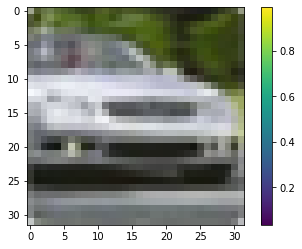

In [48]:
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [65]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')  
])

In [66]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [67]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [68]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1250/1250 [==============================] - 19s 13ms/step - loss: 2.0521 - accuracy: 0.2446 - val_loss: 1.7905 - val_accuracy: 0.3424
Epoch 2/10
1250/1250 [==============================] - 17s 13ms/step - loss: 1.7745 - accuracy: 0.3602 - val_loss: 1.7587 - val_accuracy: 0.3569
Epoch 3/10
1250/1250 [==============================] - 13s 11ms/step - loss: 1.6821 - accuracy: 0.3922 - val_loss: 1.6458 - val_accuracy: 0.4080
Epoch 4/10
1250/1250 [==============================] - 16s 13ms/step - loss: 1.6278 - accuracy: 0.4182 - val_loss: 1.6170 - val_accuracy: 0.4176
Epoch 5/10
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5822 - accuracy: 0.4360 - val_loss: 1.5855 - val_accuracy: 0.4283
Epoch 6/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.5413 - accuracy: 0.4459 - val_loss: 1.6280 - val_accuracy: 0.4196
Epoch 7/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.5196 - accuracy: 0.4600 - val_loss: 1.5369 -

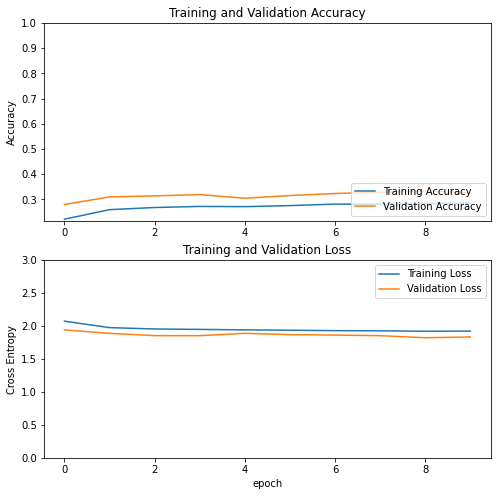

In [60]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()